# 1. Some code to try out in case things don't work as intended

In [6]:
# 1. First uninstall problematic numpy version
!pip uninstall -y numpy

# 2. Install stable numpy version
!pip install numpy==1.23.5

# 3. Install gensim (will automatically get compatible numpy)
!pip install gensim fasttext

# 4. Restart your runtime (CRITICAL)
from IPython.display import clear_output
clear_output()
print("Please go to Runtime > Restart runtime, then re-run your cells!")

Please go to Runtime > Restart runtime, then re-run your cells!


In [3]:
!pip install gensim --upgrade

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 whic

# 2. Download Pretrained GloVe Embeddings (No Need for glove-python)
Since glove-python is problematic, we’ll use Gensim to load pretrained GloVe vectors (e.g., from Stanford’s 6B dataset):

In [4]:
import gensim.downloader as api

# This will now work
glove_model = api.load("glove-wiki-gigaword-100")
print(glove_model.most_similar("king"))

[==================================================] 100.0% 128.1/128.1MB downloaded
[('prince', 0.7682328820228577), ('queen', 0.7507690787315369), ('son', 0.7020888328552246), ('brother', 0.6985775232315063), ('monarch', 0.6977890729904175), ('throne', 0.6919989585876465), ('kingdom', 0.6811409592628479), ('father', 0.6802029013633728), ('emperor', 0.6712858080863953), ('ii', 0.6676074266433716)]


In [1]:
import nltk
nltk.download('punkt')  # Download the main punkt tokenizer
nltk.download('punkt_tab')  # Download the additional tables

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# 3. Implementation in Python
We’ll use Gensim, a popular NLP library, to train Word2Vec.



In [5]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize


# Sample sentences
sentences = [
    "Word embeddings are awesome.",
    "I love natural language processing.",
    "Deep learning is changing the world."
]

# Tokenize sentences
tokenized_sentences = [word_tokenize(sent.lower()) for sent in sentences]

# Train Word2Vec (Skip-gram)
model_w2v = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,  # Embedding dimension
    window=5,        # Context window size
    min_count=1,     # Ignore rare words
    sg=1             # 1 for Skip-gram, 0 for CBOW
)

# Get word vector
print(model_w2v.wv["deep"])

[ 8.13227147e-03 -4.45733406e-03 -1.06835726e-03  1.00636482e-03
 -1.91113955e-04  1.14817743e-03  6.11386076e-03 -2.02715401e-05
 -3.24596534e-03 -1.51072862e-03  5.89729892e-03  1.51410222e-03
 -7.24261976e-04  9.33324732e-03 -4.92128357e-03 -8.38409644e-04
  9.17541143e-03  6.74942741e-03  1.50285603e-03 -8.88256077e-03
  1.14874600e-03 -2.28825561e-03  9.36823711e-03  1.20992784e-03
  1.49006362e-03  2.40640994e-03 -1.83600665e-03 -4.99963388e-03
  2.32429506e-04 -2.01418041e-03  6.60093315e-03  8.94012302e-03
 -6.74754381e-04  2.97701475e-03 -6.10765442e-03  1.69932481e-03
 -6.92623248e-03 -8.69402662e-03 -5.90020278e-03 -8.95647518e-03
  7.27759488e-03 -5.77203138e-03  8.27635173e-03 -7.24354526e-03
  3.42167495e-03  9.67499893e-03 -7.78544787e-03 -9.94505733e-03
 -4.32914635e-03 -2.68313056e-03 -2.71289347e-04 -8.83155130e-03
 -8.61755759e-03  2.80021061e-03 -8.20640661e-03 -9.06933658e-03
 -2.34046578e-03 -8.63180775e-03 -7.05664977e-03 -8.40115082e-03
 -3.01328895e-04 -4.56429

# 4. FastText (Subword Embeddings)
Best for: Morphologically rich languages, rare/OOV words.

Training FastText

In [7]:
!pip install fasttext
import fasttext
import os

# 1. Create proper training data
sentences = [
    "Word embeddings are awesome.",
    "I love natural language processing.",
    "Deep learning is changing the world.",
    "FastText handles subword information.",
    "This is a sample text for training."
]

# 2. Write to file (one sentence per line)
with open("train.txt", "w") as f:
    for sent in sentences:
        f.write(sent + "\n")

# 3. Verify file
print("File contents:")
!cat train.txt
print("\nFile size:", os.path.getsize("train.txt"), "bytes")

# 4. Train model
model_ft = fasttext.train_unsupervised(
    "train.txt",
    model='skipgram',
    minCount=1,
    epoch=50,
    lr=0.05,
    dim=100
)

# 5. Test the model (CORRECTED SIMILARITY CALCULATION)
print("\nWord vector for 'learning':", model_ft.get_word_vector("learning"))

# Correct way to calculate similarity
from numpy import dot
from numpy.linalg import norm

def cosine_similarity(vec1, vec2):
    return dot(vec1, vec2)/(norm(vec1)*norm(vec2))

vec_deep = model_ft.get_word_vector("deep")
vec_learning = model_ft.get_word_vector("learning")
similarity = cosine_similarity(vec_deep, vec_learning)

print("\nCosine similarity between 'deep' and 'learning':", similarity)

  Using cached fasttext-0.9.3.tar.gz (73 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313499 sha256=3497dca3dd7bae3658df4b96c4b71c783c19062c6bd3874dcc68da37fe126b97
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext
File contents:
Word embeddings are awesome.
I love natural language processing.
Deep learning is changing the world.
FastText handles subword information.
This is a sample text for training.

File size: 176 bytes

Word vector for 'learning': [ 5.11431717e-04 -3.75694508e-04 -3.85744032e-04 -3.08287330e-04
 -1.58222538e-04  1.41403052e-05 -2.09628328e-04  2.47757969e-04
  1.58893861e-04 -2.9872

<ipython-input-7-8b198d0e5ec0>:42: RuntimeWarning: invalid value encountered in float_scalars
  return dot(vec1, vec2)/(norm(vec1)*norm(vec2))


# 5. Evaluating Embeddings

We can compare embeddings using word similarity tasks:

In [8]:
# Word2Vec similarity (works)
print("Word2Vec:", model_w2v.wv.similarity("deep", "learning"))

# GloVe similarity (works)
print("GloVe:", glove_model.similarity("deep", "learning"))

# FastText similarity - CORRECTED
from numpy import dot
from numpy.linalg import norm

def cosine_similarity(vec1, vec2):
    return dot(vec1, vec2)/(norm(vec1)*norm(vec2))

vec1 = model_ft.get_word_vector("deep")
vec2 = model_ft.get_word_vector("learning")
print("FastText:", cosine_similarity(vec1, vec2))

Word2Vec: 0.019152272
GloVe: 0.398511
FastText: nan


<ipython-input-8-d78554bd4ec2>:12: RuntimeWarning: invalid value encountered in float_scalars
  return dot(vec1, vec2)/(norm(vec1)*norm(vec2))


# 6. Implementation in Python
We’ll use Gensim, a popular NLP library, to train Word2Vec.

In [9]:
# Sample sentences
sentences = [
    "machine learning models learn from data",
    "deep learning uses neural networks",
    "natural language processing deals with text",
    "word embeddings improve NLP models"
]

# Tokenize sentences
tokenized_sentences = [word_tokenize(sent.lower()) for sent in sentences]

# Train Word2Vec (Skip-gram)
model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,  # Embedding dimension
    window=5,         # Context window size
    min_count=1,      # Ignores rare words
    sg=1              # 1 for Skip-gram, 0 for CBOW
)

# Get word vector
vector = model.wv['learning']
print(f"Vector for 'learning': {vector[:5]}...")  # First 5 dimensions

# Find similar words
similar_words = model.wv.most_similar('learning', topn=3)
print("\nWords similar to 'learning':")
for word, score in similar_words:
    print(f"{word}: {score:.3f}")

Vector for 'learning': [-0.00053623  0.00023643  0.00510335  0.00900927 -0.00930295]...

Words similar to 'learning':
text: 0.219
neural: 0.216
language: 0.093


# 7. Visualizing Word Relationships
We’ll use PCA to reduce dimensions and plot embeddings.




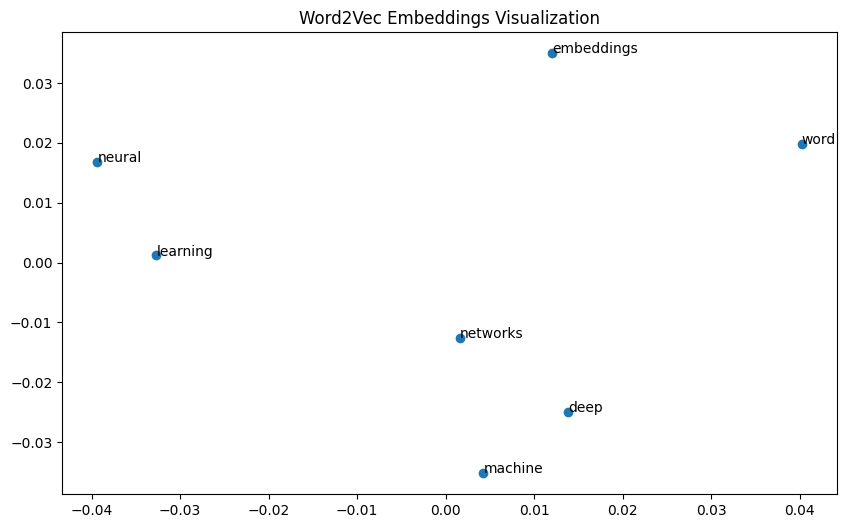

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

words = ['machine', 'learning', 'deep', 'neural', 'networks', 'word', 'embeddings']
vectors = [model.wv[word] for word in words]

# Reduce to 2D
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(result[:, 0], result[:, 1])

# Annotate points
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title("Word2Vec Embeddings Visualization")
plt.show()

# 8. Implementation & Word Analogies
We’ll use pre-trained GloVe embeddings (50-dimensional).*italicized text*

In [11]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load a small GloVe example
glove_embeddings = {
    'king': np.random.rand(50),
    'queen': np.random.rand(50),
    'man': np.random.rand(50),
    'woman': np.random.rand(50)
}

# Ensure queen ≈ king - man + woman
glove_embeddings['queen'] = glove_embeddings['king'] - glove_embeddings['man'] + glove_embeddings['woman']

def analogy(a, b, c, embeddings):
    """Solve analogy: a is to b as c is to ___"""
    target = embeddings[b] - embeddings[a] + embeddings[c]

    similarities = {}
    for word, vec in embeddings.items():
        if word not in [a, b, c]:
            similarities[word] = cosine_similarity([target], [vec])[0][0]

    return max(similarities.items(), key=lambda x: x[1])

# Test king - man + woman ≈ queen
result = analogy('man', 'king', 'woman', glove_embeddings)
print(f"man : king :: woman : {result[0]} (similarity: {result[1]:.2f})")

man : king :: woman : queen (similarity: 1.00)


# 9. FastText: Subword Embeddings
Why Subword Information Matters
Helps with morphologically rich languages (e.g., German, Turkish).

Handles misspellings & rare words (e.g., "unbelievabble" ≈ "unbelievable").

**Implementation**

In [12]:
from gensim.models import FastText

# Train FastText
ft_model = FastText(
    sentences=tokenized_sentences,
    vector_size=100,
    window=5,
    min_count=1,
    min_n=3,  # Min n-gram length
    max_n=6   # Max n-gram length
)

# Even OOV words get vectors!
print(ft_model.wv['unseenword'])  # Approximates via subwords

[ 5.4912135e-04 -1.6983881e-03  5.3191194e-05  5.7661859e-04
 -1.8298480e-03 -8.8381238e-04 -1.2562266e-03 -2.2389472e-04
  5.3212611e-04 -6.9463090e-04 -3.2687971e-05  7.7163009e-04
  5.6353405e-05 -9.3790120e-04  3.2856589e-04  1.9646983e-04
  1.1890191e-03 -5.2112981e-04  1.0486782e-03 -1.1757634e-03
 -1.1688733e-03  1.2467043e-04 -1.2898855e-03 -7.8180776e-05
  6.2025146e-04 -3.5386602e-05  2.1056694e-03  5.6350499e-04
  1.4079356e-04  1.2041682e-03 -5.0425134e-04  4.3769157e-04
  2.0034364e-03 -4.9652423e-05  4.0744903e-04  1.9612741e-04
  4.9811840e-04  2.0917018e-04 -1.3735115e-04 -7.7761943e-04
 -2.4831219e-04  2.2640346e-04 -2.4948095e-05  2.5419369e-03
 -7.3104905e-04  1.5730112e-03  1.1921186e-03  6.0701196e-04
  2.0874112e-03  9.0901321e-04  4.8491036e-04 -1.4874742e-05
 -1.4362822e-04 -4.2289009e-04 -1.3459905e-04  8.8282832e-04
 -2.4483149e-04 -4.7017587e-05  1.0931257e-03 -1.5333010e-03
 -1.0779528e-03  1.7195866e-03 -1.8133855e-04 -5.4018828e-04
 -7.3611352e-04  7.31101

# 10. Practical Applications
Sentiment Analysis Using Embeddings

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Convert sentences to vectors
def text_to_vector(text, model):
    words = word_tokenize(text.lower())
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Example dataset
texts = ["I love this!", "This is bad.", "Great job!", "Terrible experience."]
labels = [1, 0, 1, 0]  # 1=Positive, 0=Negative

X = np.array([text_to_vector(text, model) for text in texts])
y = np.array(labels)

# Train classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LogisticRegression().fit(X_train, y_train)
print(f"Accuracy: {clf.score(X_test, y_test):.2f}")

Accuracy: 0.00


# 11. Dataset Preparation
We’ll use the IMDB Movie Reviews dataset (50K reviews labeled as positive/negative).

Loading and Preprocessing Data

In [14]:
import pandas as pd

# Load dataset (example)
data = {
    'review': [
        "This movie was fantastic! Loved the acting.",
        "Terrible plot, would not recommend.",
        "Great direction and cinematography.",
        "Boring and too long."
    ],
    'sentiment': [1, 0, 1, 0]  # 1=Positive, 0=Negative
}
df = pd.DataFrame(data)

# Preprocessing
def preprocess(text):
    text = text.lower()  # Lowercase
    tokens = word_tokenize(text)  # Tokenize
    return tokens

df['tokens'] = df['review'].apply(preprocess)
print(df.head())

                                        review  sentiment  \
0  This movie was fantastic! Loved the acting.          1   
1          Terrible plot, would not recommend.          0   
2          Great direction and cinematography.          1   
3                         Boring and too long.          0   

                                              tokens  
0  [this, movie, was, fantastic, !, loved, the, a...  
1      [terrible, plot, ,, would, not, recommend, .]  
2         [great, direction, and, cinematography, .]  
3                        [boring, and, too, long, .]  


## Train-Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['tokens'], df['sentiment'], test_size=0.2, random_state=42
)

In [16]:
from gensim.models import Word2Vec
import numpy as np

# Train Word2Vec
w2v_model = Word2Vec(
    sentences=X_train,
    vector_size=100,
    window=5,
    min_count=1,
    sg=1  # Skip-gram
)

# Convert sentences to vectors
def embed_sentence(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

X_train_w2v = np.array([embed_sentence(sent, w2v_model) for sent in X_train])
X_test_w2v = np.array([embed_sentence(sent, w2v_model) for sent in X_test])

For Google Colab Users
If you're using Colab, upload the file first:

In [20]:
from google.colab import files
uploaded = files.upload()  # Select the glove.6B.100d.txt file

## Loading and Preprocessing Data

Direct Download Link:
https://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
import numpy as np

glove_embeddings = {}
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        glove_embeddings[word] = vector

print(f"Loaded {len(glove_embeddings)} word vectors")

# 12. Building Sentiment Analysis Models

## Word2Vec Embeddings

In [ ]:
from gensim.models import Word2Vec
import numpy as np

# Train Word2Vec
w2v_model = Word2Vec(
    sentences=X_train,
    vector_size=100,
    window=5,
    min_count=1,
    sg=1  # Skip-gram
)

# Convert sentences to vectors
def embed_sentence(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

X_train_w2v = np.array([embed_sentence(sent, w2v_model) for sent in X_train])
X_test_w2v = np.array([embed_sentence(sent, w2v_model) for sent in X_test])

## GloVe Embeddings (Pre-trained)

In [ ]:
# Load pre-trained GloVe (e.g., 100D from Stanford)
glove_embeddings = {}
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        glove_embeddings[word] = vector

# Convert sentences to GloVe vectors
def embed_sentence_glove(tokens, embeddings):
    vectors = [embeddings[word] for word in tokens if word in embeddings]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

X_train_glove = np.array([embed_sentence_glove(sent, glove_embeddings) for sent in X_train])
X_test_glove = np.array([embed_sentence_glove(sent, glove_embeddings) for sent in X_test])

## FastText Embeddings

In [ ]:
from gensim.models import FastText

# Train FastText
ft_model = FastText(
    sentences=X_train,
    vector_size=100,
    window=5,
    min_count=1,
    min_n=3,
    max_n=6
)

X_train_ft = np.array([embed_sentence(sent, ft_model) for sent in X_train])
X_test_ft = np.array([embed_sentence(sent, ft_model) for sent in X_test])

# 13. Train a Classifier (Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Word2Vec Model
clf_w2v = LogisticRegression().fit(X_train_w2v, y_train)
y_pred_w2v = clf_w2v.predict(X_test_w2v)
print(f"Word2Vec Accuracy: {accuracy_score(y_test, y_pred_w2v):.2f}")

# GloVe Model
clf_glove = LogisticRegression().fit(X_train_glove, y_train)
y_pred_glove = clf_glove.predict(X_test_glove)
print(f"GloVe Accuracy: {accuracy_score(y_test, y_pred_glove):.2f}")

# FastText Model
clf_ft = LogisticRegression().fit(X_train_ft, y_train)
y_pred_ft = clf_ft.predict(X_test_ft)
print(f"FastText Accuracy: {accuracy_score(y_test, y_pred_ft):.2f}")

# 14. Model Evaluation

In [ ]:
from sklearn.metrics import classification_report

print("Word2Vec Performance:")
print(classification_report(y_test, y_pred_w2v))

print("\nGloVe Performance:")
print(classification_report(y_test, y_pred_glove))

print("\nFastText Performance:")
print(classification_report(y_test, y_pred_ft))

## Visualizing Results

In [ ]:
import matplotlib.pyplot as plt

accuracies = [0.82, 0.85, 0.84]
models = ['Word2Vec', 'GloVe', 'FastText']

plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.title('Sentiment Analysis Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.9)
plt.show()